<a href="https://colab.research.google.com/github/ankitmavani/Hotel_Data_Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [6]:
df = pd.read_csv("drive/MyDrive/AlmaBetter/Project/Hotel Bookings.csv")

In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
for i in df.columns:
    print("-"*32)
    print(i , df[i].nunique())
    print(df[i].unique())

# Missing Data in Dataset


In [13]:
Missing_data = pd.DataFrame([df.isnull().sum(),df.isnull().sum()*100.0/df.shape[0]]).T
Missing_data.columns = ["number_of_missing_data", "missing_data_percentage"]
Missing_data.sort_values(by = ["number_of_missing_data"],ascending=False).head()

,number_of_missing_data,missing_data_percentage
company,112593.0,94.306893
agent,16340.0,13.686238
country,488.0,0.408744
children,4.0,0.003350
reserved_room_type,0.0,0.000000


# Data Cleaning

## drop duplicate and more missing value columns

In [14]:
df[df.duplicated()].shape

(31994, 32)

In [15]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(87396, 32)

In [16]:
df.drop(labels=["agent","company"],axis=1,inplace=True)
df.shape

(87396, 30)

# Data Analysis

## Hotel and booking cancel or not analysis


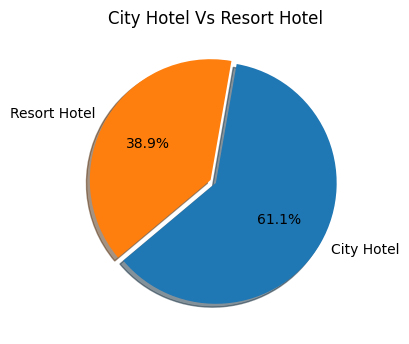

In [17]:
fig, ax = plt.subplots(figsize= (4, 4), dpi = 100)
explode = (0, 0.05)
ax.pie(df["hotel"].value_counts(), labels = ["City Hotel","Resort Hotel"], autopct = '%1.1f%%', shadow = True,
      startangle = 220, explode = explode)
plt.title("City Hotel Vs Resort Hotel")
plt.show()

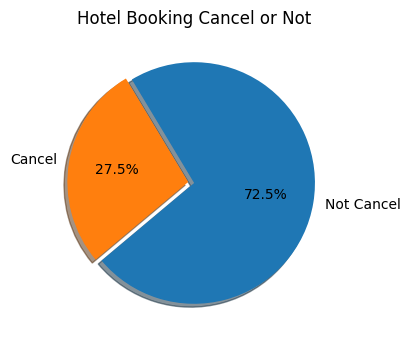

In [18]:
fig, ax = plt.subplots(figsize= (4, 4), dpi = 100)
explode = (0, 0.05)
ax.pie(df["is_canceled"].value_counts(), labels = ["Not Cancel","Cancel"], autopct = '%1.1f%%', shadow = True,
      startangle = 220, explode = explode)
plt.title("Hotel Booking Cancel or Not")
plt.show()

Text(0.5, 1.0, 'hotel vs is_canceled')

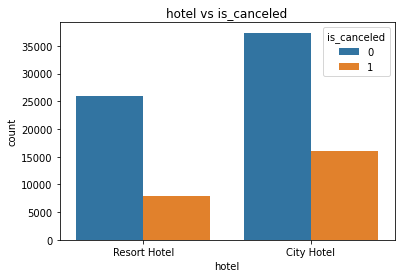

In [19]:
sns.countplot(x=df["hotel"],hue=df["is_canceled"])
plt.title("hotel vs is_canceled")

## Lead Time Analysis

Text(0.5, 1.0, 'Lead Time vs Hotel')

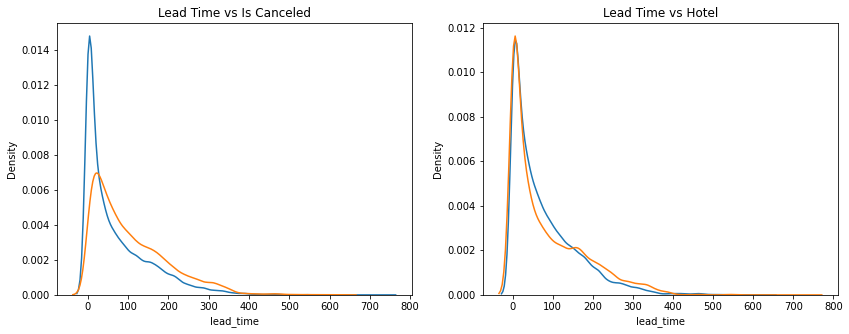

In [23]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(df[df['is_canceled']==0]['lead_time'],hist=False)
sns.distplot(df[df['is_canceled']==1]['lead_time'],hist=False)
plt.title("Lead Time vs Is Canceled")
plt.subplot(1,2,2)
sns.distplot(df[df['hotel']=="City Hotel"]['lead_time'],hist=False)
sns.distplot(df[df['hotel']=="Resort Hotel"]['lead_time'],hist=False)
plt.title("Lead Time vs Hotel")

## Arrival Year, month, Days, Week Analysis

Text(0.5, 1.0, 'Arrival Month vs Cancel')

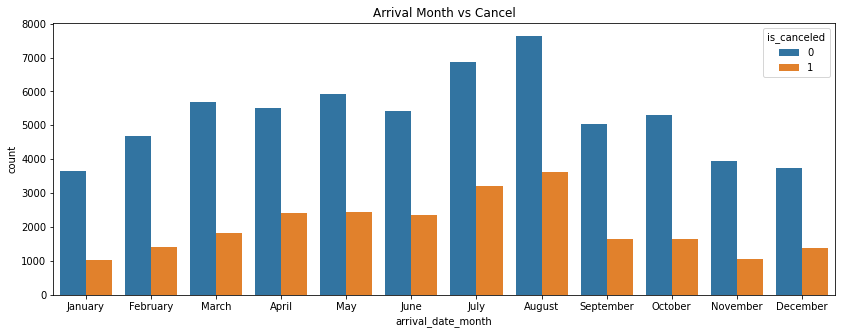

In [24]:
plt.figure(figsize=(14,5))
sns.countplot(
    x=df["arrival_date_month"],
    hue=df["is_canceled"],
    order=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
)
plt.title("Arrival Month vs Cancel")

Text(0.5, 1.0, 'Arrival Day vs Cancel')

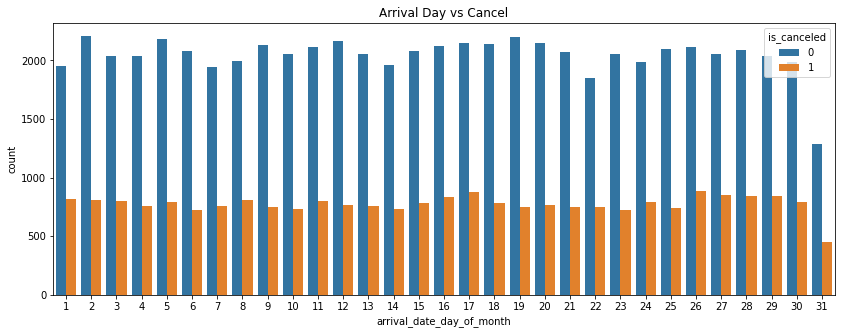

In [25]:
plt.figure(figsize=(14,5))
sns.countplot(
    x=df["arrival_date_day_of_month"],
    hue=df["is_canceled"],
)
plt.title("Arrival Day vs Cancel")

Text(0.5, 1.0, 'Arrival Week vs Cancel')

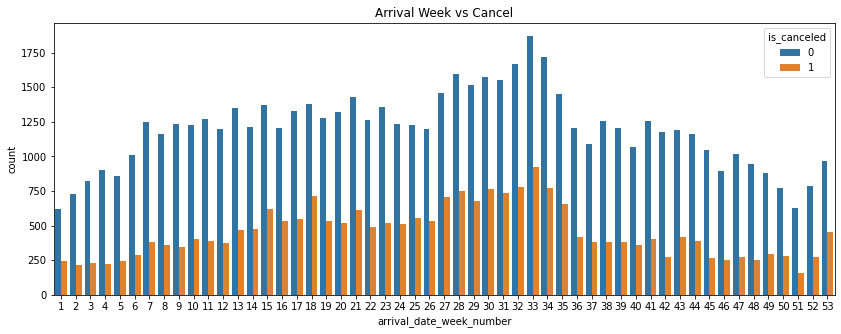

In [26]:
plt.figure(figsize=(14,5))
sns.countplot(
    x=df["arrival_date_week_number"],
    hue=df["is_canceled"],
)
plt.title("Arrival Week vs Cancel")

Text(0.5, 1.0, 'Arrival Year vs Cancel')

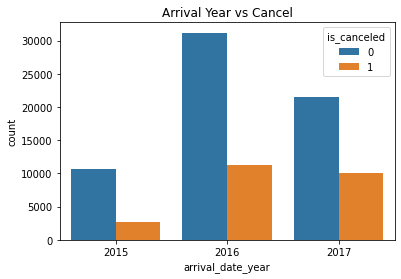

In [27]:
# plt.figure(figsize=(14,5))
sns.countplot(
    x=df["arrival_date_year"],
    hue=df["is_canceled"],
)
plt.title("Arrival Year vs Cancel")

Text(0.5, 1.0, 'Arrival Month vs Cancel')

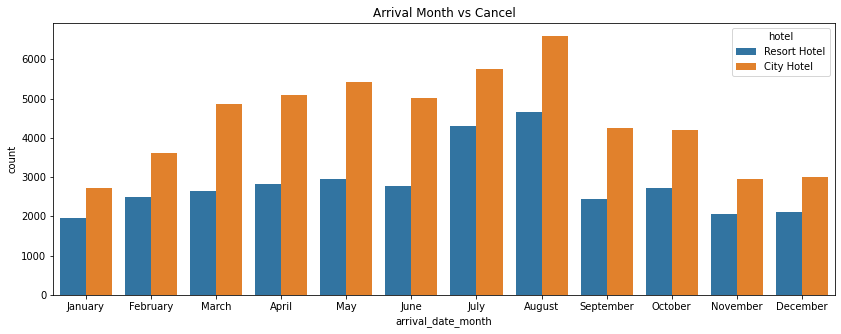

In [28]:
plt.figure(figsize=(14,5))
sns.countplot(
    x=df["arrival_date_month"],
    hue=df["hotel"],
    order=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
)
plt.title("Arrival Month vs Cancel")

Text(0.5, 1.0, 'Arrival Month vs Cancel')

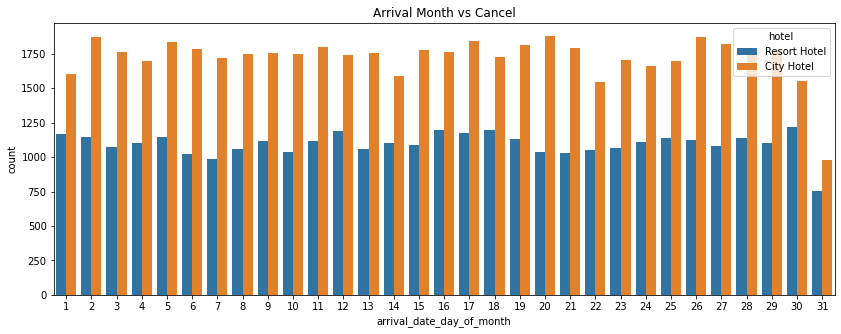

In [29]:
plt.figure(figsize=(14,5))

sns.countplot(
    x=df["arrival_date_day_of_month"],
    hue=df["hotel"],
#     order=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
)
plt.title("Arrival Month vs Cancel")

Text(0.5, 1.0, 'Arrival Month vs Cancel')

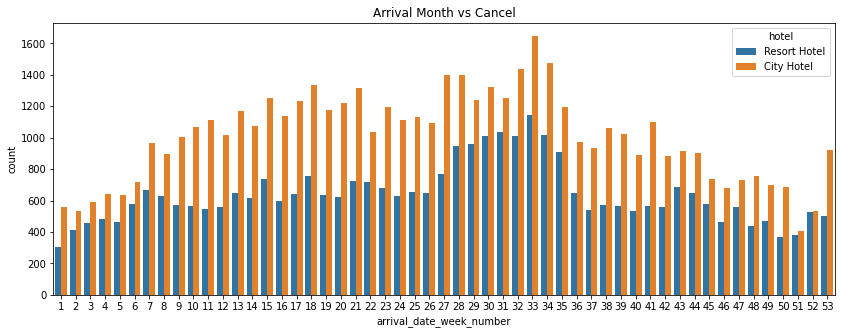

In [30]:
plt.figure(figsize=(14,5))
sns.countplot(
    x=df["arrival_date_week_number"],
    hue=df["hotel"],
#     order=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
)
plt.title("Arrival Month vs Cancel")

Text(0.5, 1.0, 'Arrival Month vs Cancel')

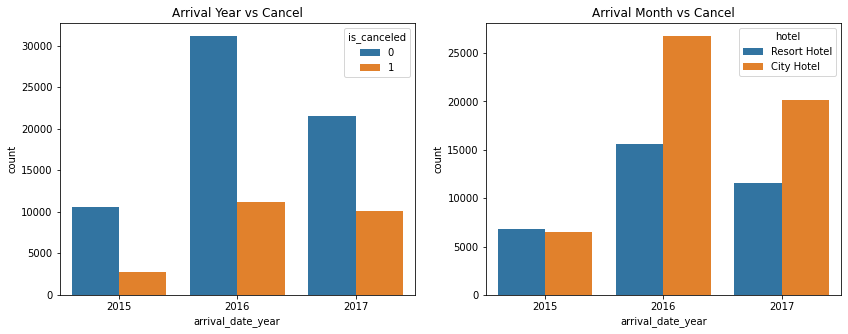

In [31]:
plt.figure(figsize=(14,5))
# plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(
    x=df["arrival_date_year"],
    hue=df["is_canceled"],
)
plt.title("Arrival Year vs Cancel")
plt.subplot(1,2,2)
sns.countplot(
    x=df["arrival_date_year"],
    hue=df["hotel"],
#     order=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
)
plt.title("Arrival Month vs Cancel")